In [1]:
import pandas_profiling
from pandas_profiling import ProfileReport
import nltk
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt 
import seaborn as sb
import warnings 
warnings.filterwarnings("ignore")
import unidecode
from wordcloud import WordCloud
from collections import Counter
%matplotlib inline

/var/folders/f4/w1jmmbtn33l34957t7w1qcjc0000gn/T/ipykernel_16607/3426264303.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


# Hugging Face Dataset Visualization

### Read the Dataset 

In [2]:
hf = pd.read_csv('data/Cleaning/HuggingFace_Dataset.csv',on_bad_lines='skip')
hf.head()

label                                        clean_tweet  \
0      0  spread positiv give someon high five today pos...   
1      0  difficult ask mani languag measur happi unifor...   
2      0  pray orlando orlando orlandostrong bestrong pr...   
3      0      bought thing kyli cosmet today ddd lovethemal   
4      0  gorgeou modeltoi look wild sexi follow victori...   

                                          Hash Words  
0       #positiveenergy #highfive #tuesdaymotivation  
1                             #languages- #happiness  
2  #orlando #orlandostrong #bestrong #pray #belie...  
3                                       #lovethemall  
4                                             #model

In [3]:
hf_profile = ProfileReport(hf, title ="Hugging Face Dataset Report")

In [4]:
hf_profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
hf.label.value_counts()

0    25255
1     1676
Name: label, dtype: int64

### Boxplot of the Label Distribution 

In [6]:
hf['text length'] = hf['clean_tweet'].apply(len)

<AxesSubplot:xlabel='label', ylabel='text length'>

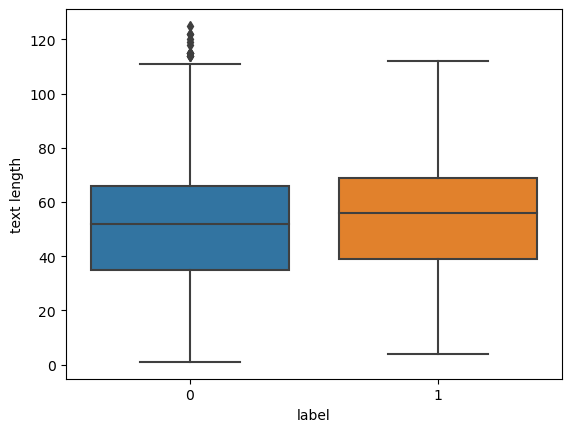

In [7]:
sb.boxplot(x='label', y='text length', data=hf)

### Wordcloud of the Most Popular Hashtags of Each Tweet Type

In [8]:
hf

label                                        clean_tweet  \
0          0  spread positiv give someon high five today pos...   
1          0  difficult ask mani languag measur happi unifor...   
2          0  pray orlando orlando orlandostrong bestrong pr...   
3          0      bought thing kyli cosmet today ddd lovethemal   
4          0  gorgeou modeltoi look wild sexi follow victori...   
...      ...                                                ...   
26926      0                    goodnight sweet dream grate ddd   
26927      0  belum ku liat si dd mayb soon insha allah go w...   
26928      0  cheer sexysunday onset sexi rileysteel dress s...   
26929      0                      oooooo go soo jasonbourn back   
26930      0  think logo small riff titl sequenc 34 aai 12 3...   

                                              Hash Words  text length  
0           #positiveenergy #highfive #tuesdaymotivation           78  
1                                 #languages- #happiness           56  
2      #orlando #orlandostrong #bestrong #pray #belie...           95  
3                                           #lovethemall           45  
4                                                 #model           61  
...                                                  ...          ...  
26926                                          #grateful           31  
26927                                        No hashtags           50  
26928  #sexysunday #onset #sexy #rileysteele #dress #...           67  
26929                                       #jasonbourne           29  
26930                              #themetalgentleman #a           65  

[26931 rows x 4 columns]

In [9]:
hf.dtypes

label           int64
clean_tweet    object
Hash Words     object
text length     int64
dtype: object

In [10]:
non_hate = hf[hf['label'].astype(int) == 0]

In [11]:
non_hate = non_hate[non_hate['Hash Words'] != 'No hashtags']


In [12]:
non_hate

label                                        clean_tweet  \
0          0  spread positiv give someon high five today pos...   
1          0  difficult ask mani languag measur happi unifor...   
2          0  pray orlando orlando orlandostrong bestrong pr...   
3          0      bought thing kyli cosmet today ddd lovethemal   
4          0  gorgeou modeltoi look wild sexi follow victori...   
...      ...                                                ...   
26924      0                          check pleasur record amaz   
26926      0                    goodnight sweet dream grate ddd   
26928      0  cheer sexysunday onset sexi rileysteel dress s...   
26929      0                      oooooo go soo jasonbourn back   
26930      0  think logo small riff titl sequenc 34 aai 12 3...   

                                              Hash Words  text length  
0           #positiveenergy #highfive #tuesdaymotivation           78  
1                                 #languages- #happiness           56  
2      #orlando #orlandostrong #bestrong #pray #belie...           95  
3                                           #lovethemall           45  
4                                                 #model           61  
...                                                  ...          ...  
26924                        #pleasure #records #amazing           25  
26926                                          #grateful           31  
26928  #sexysunday #onset #sexy #rileysteele #dress #...           67  
26929                                       #jasonbourne           29  
26930                              #themetalgentleman #a           65  

[18012 rows x 4 columns]

In [13]:
non_hate_wordcloud = WordCloud().generate(' '.join(non_hate['Hash Words']))

(-0.5, 399.5, 199.5, -0.5)

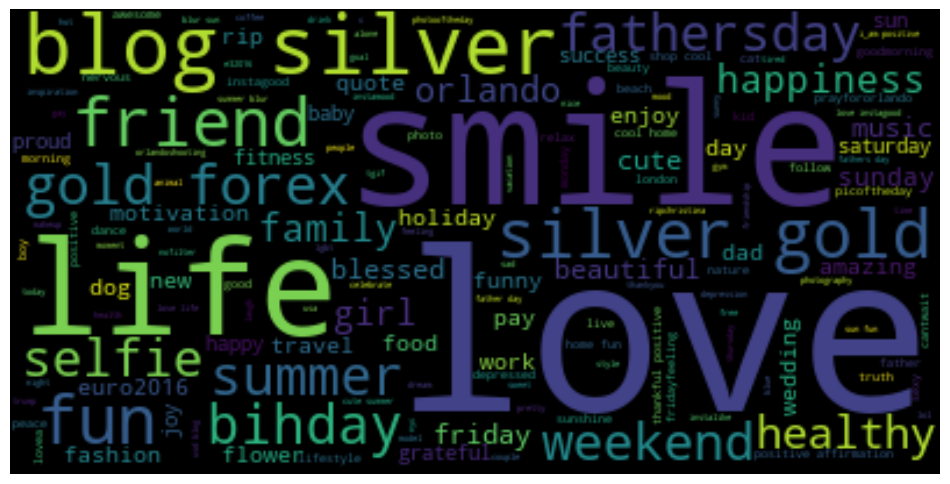

In [14]:
plt.figure(figsize= (12,8))
plt.imshow(non_hate_wordcloud, interpolation = 'bilinear',cmap='viridis')
plt.axis('off')

In [15]:
hate = hf[hf['label'].astype(int) == 1]

In [16]:
hate = hate[hate['Hash Words'] != 'No hashtags']


In [17]:
hate

label                                        clean_tweet  \
5          1         real antisemit progress minion freedom loa   
142        1            disgrac asham person fellow newyork ddc   
167        1  jeffsess omit decad record ag confirm hear sur...   
181        1  morgan freeman respond ask solv racism morganf...   
207        1  thank next four year forecast worst hope fasci...   
...      ...                                                ...   
26844      1  racist troll ale great state kentucki listen l...   
26874      1  interest linguist address race racism power ra...   
26876      1  could end 2016 without mention trump femin pho...   
26878      1                                     millenni think   
26919      1  episod 6 gun everyon podcast gun igmilitia pew...   

                                              Hash Words  text length  
5                              #antisemites #progressive           42  
142                                 #disgrace #newyorker           39  
167                                #jeffsessions #weasel           57  
181                          #morganfreeman #commonsense           63  
207                                  #fascist #2017fail!           62  
...                                                  ...          ...  
26844                        #comedy #politics #election           78  
26874       #linguistics #race #power. #raciolinguistics           65  
26876  #2016 #trump. #feminism #photographs #shockfactor           65  
26878                                       #millennials           14  
26919            #podcast #guns #igmilitia #pewpewlifea|           54  

[1149 rows x 4 columns]

In [18]:
hate_wordcloud = WordCloud().generate(' '.join(hate['Hash Words']))

(-0.5, 399.5, 199.5, -0.5)

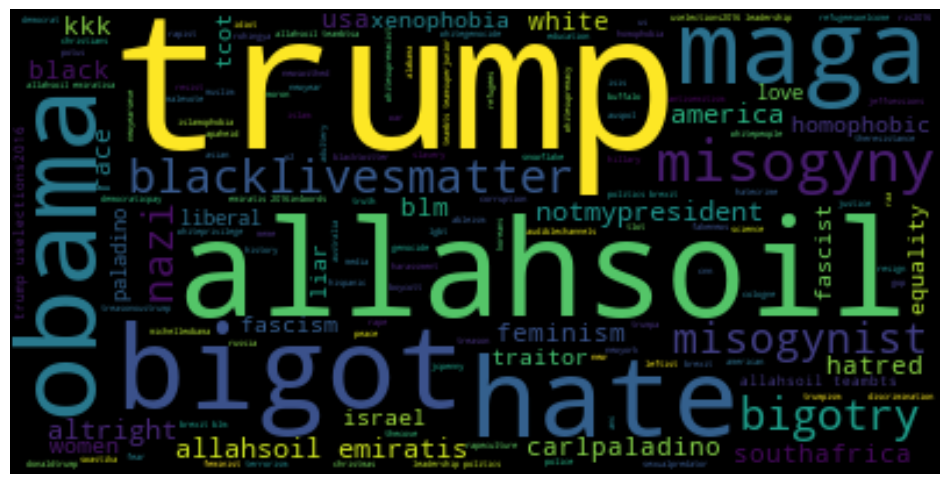

In [19]:
plt.figure(figsize= (12,8))
plt.imshow(hate_wordcloud, interpolation = 'bilinear',cmap='viridis')
plt.axis('off')

### Frequency Distribution of the Top 25 Tokens 

In [20]:
word_frequency_non_hate = non_hate['clean_tweet'].str.split(expand=True).stack().value_counts()

In [21]:
print(word_frequency_non_hate.head(25))

love       2135
day        1657
happi      1468
life        823
go          756
smile       715
today       705
dd          681
get         680
new         653
thank       608
make        594
time        591
bihday      589
like        536
father      535
weekend     499
fun         494
good        494
see         493
friend      486
feel        478
one         476
34          473
cannot      464
dtype: int64


In [22]:
non_hate_frequency = word_frequency_non_hate.head(25)

[]

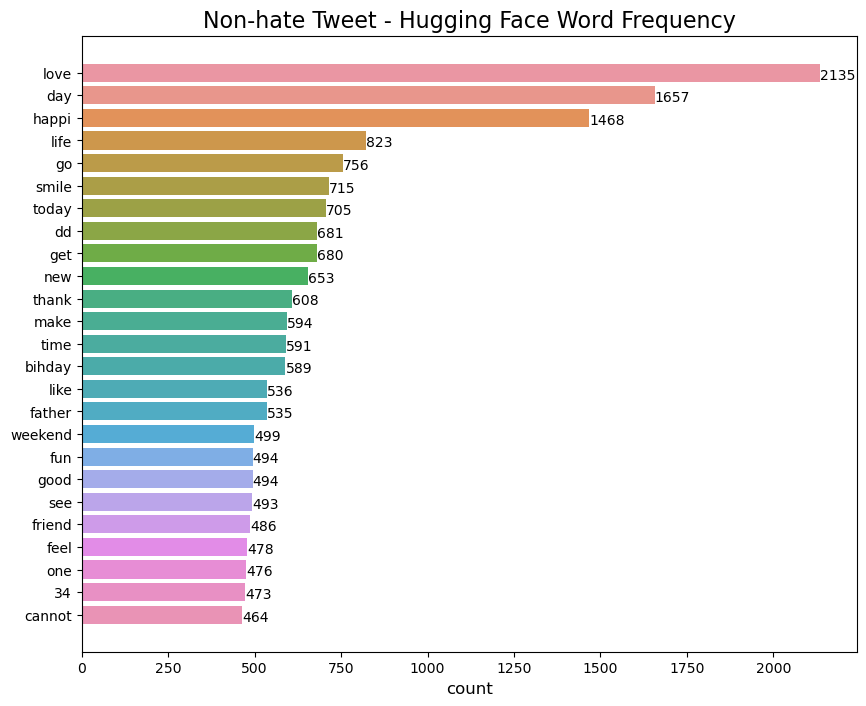

In [23]:
plt.figure(figsize=(10,8))
ax = sb.barplot(x = non_hate_frequency.values, y = non_hate_frequency.index)
plt.title('Non-hate Tweet - Hugging Face Word Frequency', fontsize=16)
plt.xlabel('count', fontsize=12)
for p in ax.patches:
    ax.annotate("{:.0f}".format(p.get_width()), (p.get_x() + p.get_width(), p.get_y()+.5), ha='left', va='center')
plt.plot()

In [24]:
word_frequency_hate = hate['clean_tweet'].str.split(expand=True).stack().value_counts()

In [25]:
hate_frequency = word_frequency_hate.head(25)
hate_frequency

trump        125
white         81
allahsoil     72
hate          58
black         56
like          53
obama         52
peopl         52
woman         51
new           42
say           40
u             40
racist        39
go            34
would         33
one           32
comment       32
america       31
2017          31
bigot         30
call          29
via           28
racism        28
get           28
let           26
dtype: int64

[]

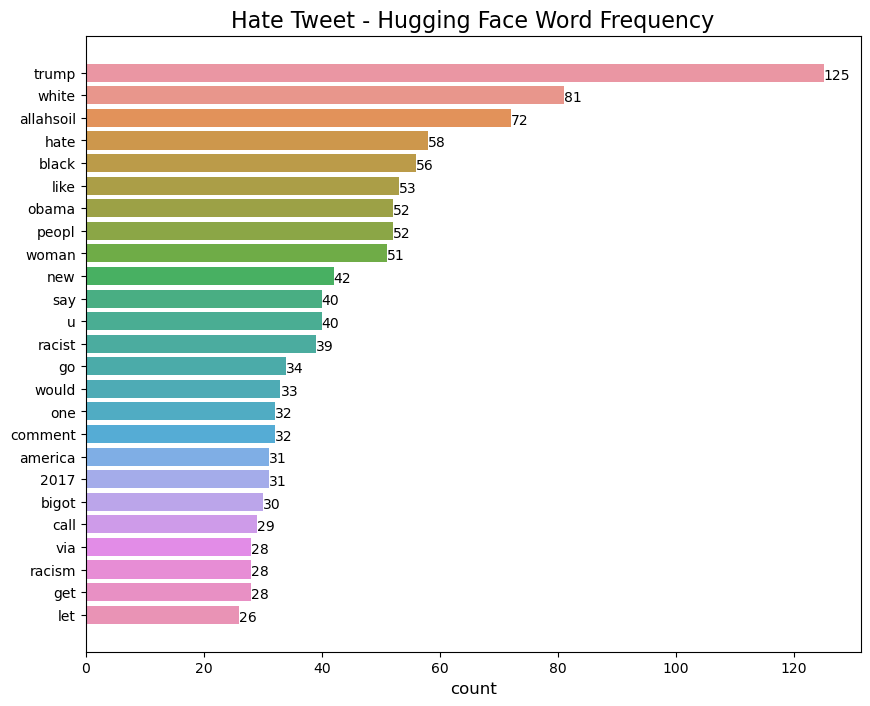

In [26]:
plt.figure(figsize=(10,8))
ax = sb.barplot(x = hate_frequency.values, y = hate_frequency.index)
plt.title('Hate Tweet - Hugging Face Word Frequency', fontsize=16)
plt.xlabel('count', fontsize=12)
for p in ax.patches:
    ax.annotate("{:.0f}".format(p.get_width()), (p.get_x() + p.get_width(), p.get_y()+.5), ha='left', va='center')
plt.plot()

# Aristotle Dataset Visualization

### Read the Dataset

In [27]:
aris = pd.read_csv('data/Cleaning/Aristotle_Dataset.csv',on_bad_lines='skip')
aris.head()

label                                        clean_tweet       Hash Words
0      0  take shot predict bengal first two draft day i...         #bengals
1      0  next week localnewspap shop wednesday afternoo...  #localnewspaper
2      0  final get player dnd soon align go think chaot...      No hashtags
3      0  commit oral write idea goal like honor commitm...      No hashtags
4      1  syrian alli iran blast you missil strike dange...      No hashtags

In [28]:
aris.label.value_counts()

0    5352
1    1538
Name: label, dtype: int64

In [29]:
aris_profile = ProfileReport(aris, title ="Aristotle Dataset Report")

In [30]:
aris_profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Boxplot of the Label Distribution 

In [31]:
aris['text length'] = aris['clean_tweet'].apply(len)

<AxesSubplot:xlabel='label', ylabel='text length'>

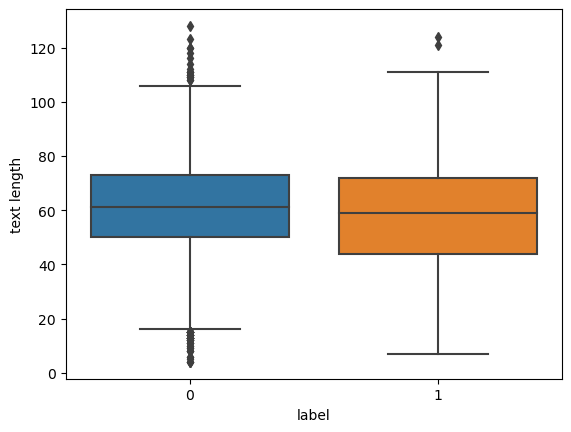

In [32]:
sb.boxplot(x='label', y='text length', data=aris)

### Wordcloud of the Most Popular Hashtags of Each Tweet Type 

In [33]:
aris

label                                        clean_tweet  \
0         0  take shot predict bengal first two draft day i...   
1         0  next week localnewspap shop wednesday afternoo...   
2         0  final get player dnd soon align go think chaot...   
3         0  commit oral write idea goal like honor commitm...   
4         1  syrian alli iran blast you missil strike dange...   
...     ...                                                ...   
6885      1  scold two littl cousin scare friend poor littl...   
6886      0  spent afternoon w 4 ucalgari theatr student jo...   
6887      0  ask pleat 5 nill today 6 scot striker english ...   
6888      0  petey green tutor program info session campu e...   
6889      0  attend east chicago mayor state citi event ame...   

           Hash Words  text length  
0            #bengals           63  
1     #localnewspaper           62  
2         No hashtags           61  
3         No hashtags           59  
4         No hashtags           74  
...               ...          ...  
6885      No hashtags           71  
6886      No hashtags           85  
6887      No hashtags           72  
6888      No hashtags           67  
6889      No hashtags           99  

[6890 rows x 4 columns]

In [34]:
non_hate_aris = aris[aris['label'].astype(int) == 0]
non_hate_aris = non_hate_aris[non_hate_aris['Hash Words'] != 'No hashtags']


In [35]:
non_hate_aris

label                                        clean_tweet  \
0         0  take shot predict bengal first two draft day i...   
1         0  next week localnewspap shop wednesday afternoo...   
7         0                      snme fan episod one 8586 year   
9         0  found transpond snail whitebeard luffi work to...   
19        0  tech news quaer you homeown iot devic say wink...   
...     ...                                                ...   
6862      0  soccer livescor polek cracoviakrakow v slaskwr...   
6866      0  white hous wealth trump employe disclos financ...   
6876      0  honor panamapap anniversari round top 10 favor...   
6880      0  lemon refus repo susan rice unmask aid abet di...   
6883      0  wrap pdaannual confer fire year great event in...   

                                      Hash Words  text length  
0                                       #bengals           63  
1                                #localnewspaper           62  
7                                          #snme           29  
9                                        #trecru           66  
19                        #iot #news #smadevices           64  
...                                          ...          ...  
6862  #livescore: #cracoviakrakow #slaskwroclaw:           75  
6866                                 #uspolitics           58  
6876                               #panamapapers           60  
6880                                    #foxnews           61  
6883                                 #pdaannual!           73  

[1607 rows x 4 columns]

In [36]:
non_hate_aris_wordcloud = WordCloud().generate(' '.join(non_hate_aris['Hash Words']))

(-0.5, 399.5, 199.5, -0.5)

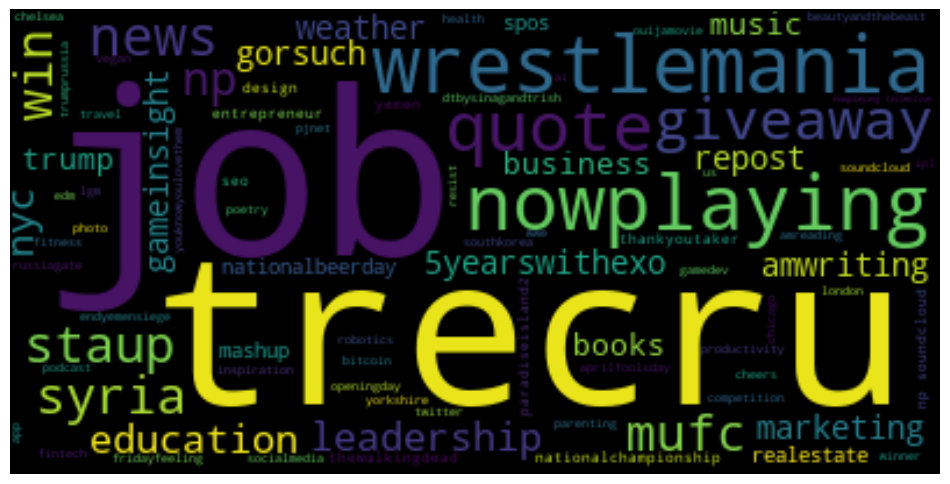

In [37]:
plt.figure(figsize= (12,8))
plt.imshow(non_hate_aris_wordcloud, interpolation = 'bilinear',cmap='viridis')
plt.axis('off')

In [38]:
hate_aris = aris[aris['label'].astype(int) == 1]
hate_aris = hate_aris[hate_aris['Hash Words'] != 'No hashtags']
hate_aris

label                                        clean_tweet  \
5         1  belat penblwydd hapu super fan elen govier lot...   
30        1  tri keep america safe islam mother fuck nation...   
71        1  let idiot ruin day life lifelesson lifeadvic l...   
97        1  memphisgrizzli gogrizz gogrizz grizzli look ha...   
146       1  deo gratia 37 year ago 3rd april holi thursday...   
...     ...                                                ...   
6696      1  look blind shutter cuain check world blind 60 ...   
6734      1  annoy whinni wimp whinw whine whine legranddeb...   
6780      1  islam train camp america sick bastard dem dnc ...   
6852      1  syriastrik make sens assad order ga attack inc...   
6884      1  tbt last japan tour epic flight offici book ha...   

                                             Hash Words  text length  
5                                            #greenarmy           81  
30                                      #extremevetting           77  
71    #life #lifelessons #lifeadvice #lifequotes #qu...           74  
97                  #memphisgrizzlies #gogrizz #gogrizz           77  
146                                           #baptized           97  
...                                                 ...          ...  
6696               #blinds #shutters #cuains #inverness           86  
6734                                      #legranddebat           58  
6780  #dnc #cnn #msnbc #rednationrising #democratsfo...           84  
6852                                      #syriastrikes           94  
6884                                               #tbt           63  

[233 rows x 4 columns]

In [39]:
hate_aris_wordcloud = WordCloud().generate(' '.join(hate_aris['Hash Words']))

(-0.5, 399.5, 199.5, -0.5)

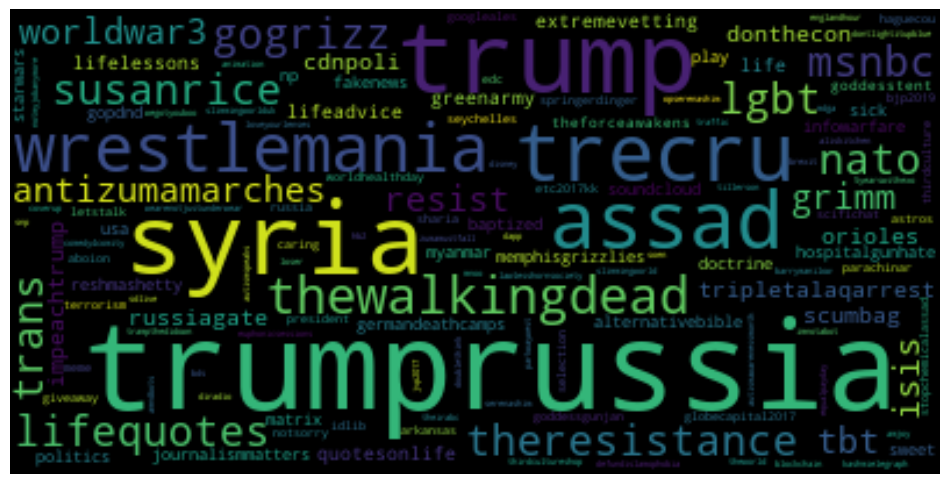

In [40]:
plt.figure(figsize= (12,8))
plt.imshow(hate_aris_wordcloud, interpolation = 'bilinear',cmap='viridis')
plt.axis('off')

### Frequency Distribution of the Top 25 Tokens 

In [41]:
word_frequency_non_hate_aris = non_hate_aris['clean_tweet'].str.split(expand=True).stack().value_counts()

In [42]:
print(word_frequency_non_hate_aris.head(25))

u        75
get      69
via      67
new      66
love     64
day      63
one      60
thank    58
make     57
go       55
time     55
great    54
like     52
today    48
work     47
see      45
say      45
win      45
need     42
look     42
year     40
1        39
let      39
know     39
would    38
dtype: int64


In [43]:
non_hate_frequency_aris = word_frequency_non_hate_aris.head(25)

[]

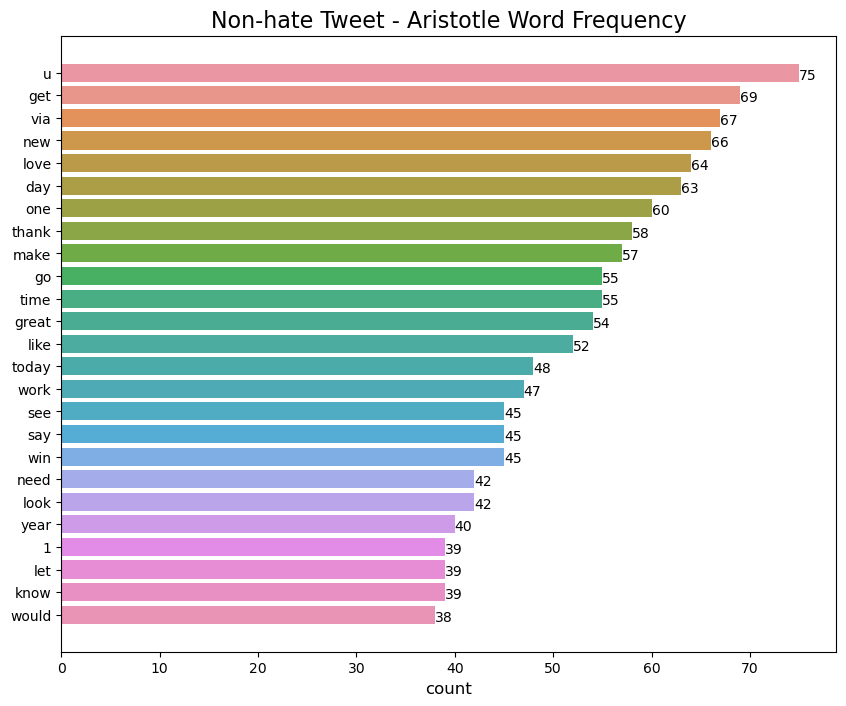

In [44]:
plt.figure(figsize=(10,8))
ax = sb.barplot(x = non_hate_frequency_aris.values, y = non_hate_frequency_aris.index)
plt.title('Non-hate Tweet - Aristotle Word Frequency', fontsize=16)
plt.xlabel('count', fontsize=12)
for p in ax.patches:
    ax.annotate("{:.0f}".format(p.get_width()), (p.get_x() + p.get_width(), p.get_y()+.5), ha='left', va='center')
plt.plot()

In [45]:
word_frequency_hate_aris = hate_aris['clean_tweet'].str.split(expand=True).stack().value_counts()

In [46]:
hate_frequency_aris = word_frequency_hate_aris.head(25)
hate_frequency_aris

trump          21
go             14
idiot          14
hate           13
one            12
bad            12
peopl          11
like           11
say            11
make           10
woman          10
world          10
u              10
get             9
look            9
kill            9
think           8
attack          8
war             8
trumprussia     8
new             8
pay             8
assad           8
time            8
day             7
dtype: int64

[]

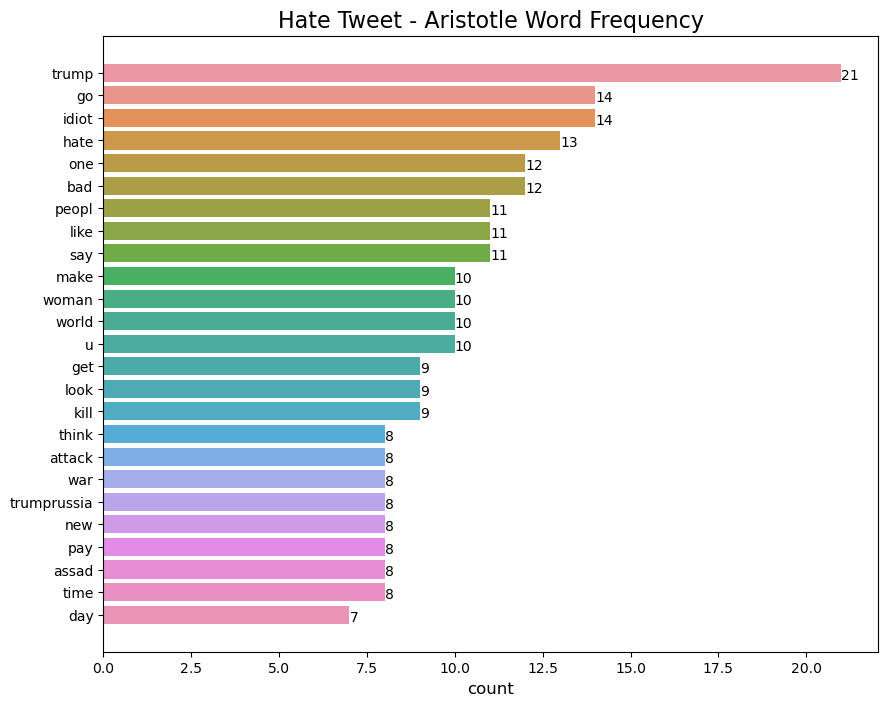

In [47]:
plt.figure(figsize=(10,8))
ax = sb.barplot(x = hate_frequency_aris.values, y = hate_frequency_aris.index)
plt.title('Hate Tweet - Aristotle Word Frequency', fontsize=16)
plt.xlabel('count', fontsize=12)
for p in ax.patches:
    ax.annotate("{:.0f}".format(p.get_width()), (p.get_x() + p.get_width(), p.get_y()+.5), ha='left', va='center')
plt.plot()

# Copenhagen Dataset Visualization

### Read the Dataset 

In [48]:
copen = pd.read_csv('data/Cleaning/Copenhagen_Dataset.csv',on_bad_lines='skip')
copen.columns

Index(['label', 'clean_tweet', 'Hash Words'], dtype='object')

In [49]:
copen

label                                        clean_tweet   Hash Words
0         0                  ok enough instant restaur alreadi  No hashtags
1         0     femal cowork asse woman choos work hooter okay  No hashtags
2         1  call sexist want girl never comment footbal me...  No hashtags
3         0       live long prosper leonard nimoy repo dead 83  No hashtags
4         1                             sexist right hate girl  No hashtags
...     ...                                                ...          ...
9263      0                                toni even cross tit  No hashtags
9264      0                       let u serv colin chev sausag  No hashtags
9265      0                                    see guilti look  No hashtags
9266      0                           booo kat andr deserv get  No hashtags
9267      0  congratul kat hate peopl australia tonight pur...  No hashtags

[9268 rows x 3 columns]

In [50]:
copen.label.value_counts()

0    6698
1    2570
Name: label, dtype: int64

In [51]:
copen_profile = ProfileReport(copen, title ="Copenhagen Dataset Report")

In [52]:
copen_profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Boxplot of the Label Distribution 

In [53]:
copen['text length'] = copen['clean_tweet'].apply(len)

<AxesSubplot:xlabel='label', ylabel='text length'>

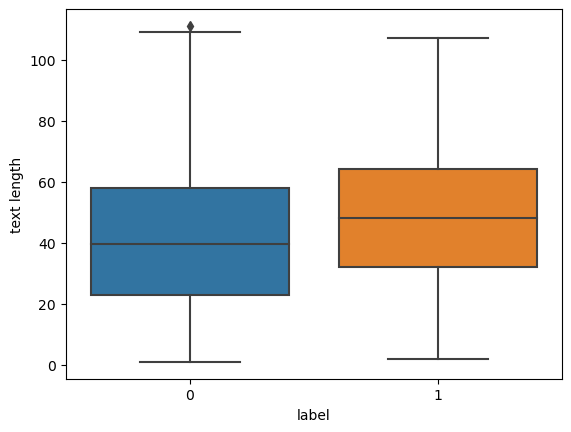

In [54]:
sb.boxplot(x='label', y='text length', data=copen)

### Wordcloud of the Most Popular Hashtags of Each Tweet Type 

In [55]:
non_hate_copen = copen[copen['label'].astype(int) == 0]
non_hate_copen = non_hate_copen[non_hate_copen['Hash Words'] != 'No hashtags']
non_hate_copen

label                                        clean_tweet  \
13        0         let u hope goat happi sasweethea happygoat   
31        0  worst actual want throw remot tv score shitti ...   
42        0  think would rather slightli cook pork chop dis...   
55        0  watch 2015 eat pork spare rib quinoa cook pork...   
63        0                  kat sour face repuls mykitchenrul   
...     ...                                                ...   
9222      0    would fair kat know noth fair wtf gtlt hypocrit   
9231      0  account liter retweet talk woman tech serious ...   
9232      0             japanes macaqu omnivor anim sexistfact   
9258      0  protest disrupt oppress affront hate act root ...   
9261      0          cabl keep gear readi moment notic gearlov   

                   Hash Words  text length  
13    #sasweetheas #happygoat           42  
31       #cheats #unfairscore           82  
42             #failedfoodies           72  
55                 #dinner...           66  
63            #mykitchenrules           33  
...                       ...          ...  
9222               #hypocrite           47  
9231                #stopw...           56  
9232             #sexistfacts           38  
9258        #blacklivesmatter           73  
9261                #gearlove           41  

[713 rows x 4 columns]

In [56]:
non_hate_copen_wordcloud = WordCloud().generate(' '.join(non_hate_copen['Hash Words']))

(-0.5, 399.5, 199.5, -0.5)

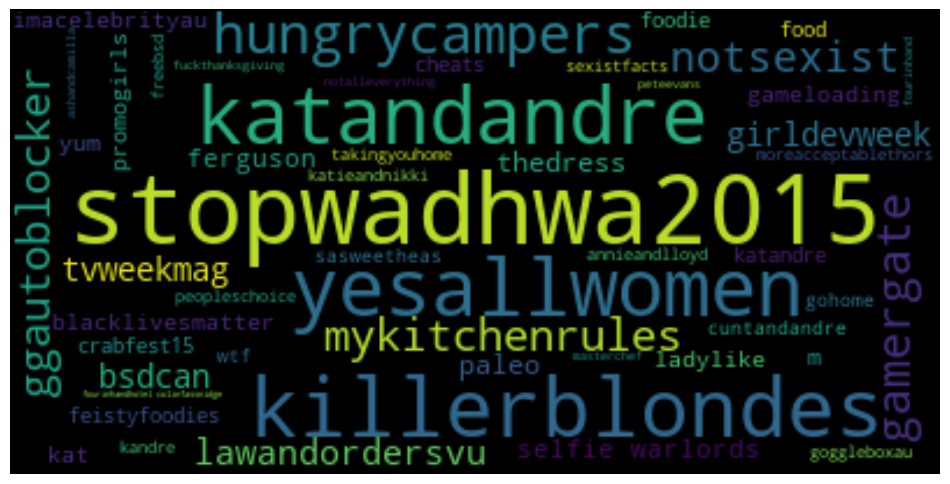

In [57]:
plt.figure(figsize= (12,8))
plt.imshow(non_hate_copen_wordcloud, interpolation = 'bilinear',cmap='viridis')
plt.axis('off')

In [58]:
hate_copen = copen[copen['label'].astype(int) == 1]
hate_copen = hate_copen[hate_copen['Hash Words'] != 'No hashtags']
hate_copen

label                                        clean_tweet  \
6         1                wellit valid question femfreefriday   
36        1  dumb asshol sexist way would punch woman show ...   
91        1  someon told femin lie communist oppos equal be...   
136       1  questionsformen know feminist think violenc ok...   
147       1  call sexist whatev go need femal person traine...   
...     ...                                                ...   
9190      1  know obviou lie paygap valenti solut would lau...   
9192      1  good talk wife much easier say shut n make sam...   
9240      1  ironi dead get bore woman stop make sens somet...   
9244      1  ladi think cannot drive know cannot park back ...   
9257      1  watch men slope style way better watch woman n...   

                 Hash Words  text length  
6            #femfreefriday           35  
36                #equality           57  
91                #feminism           63  
136        #questionsformen           74  
147          #sorrynotsorry           66  
...                     ...          ...  
9190                #paygap           68  
9192             #notsexist           71  
9240             #notsexist           73  
9244      #facts #notsex...           68  
9257  #notsexist #justsayin           64  

[561 rows x 4 columns]

In [59]:
hate_copen_wordcloud = WordCloud().generate(' '.join(hate_copen['Hash Words']))

(-0.5, 399.5, 199.5, -0.5)

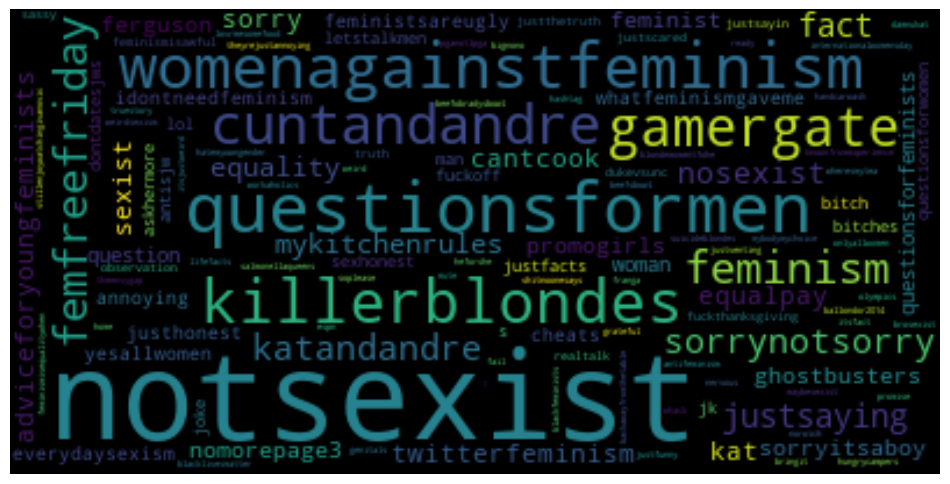

In [60]:
plt.figure(figsize= (12,8))
plt.imshow(hate_copen_wordcloud, interpolation = 'bilinear',cmap='viridis')
plt.axis('off')

### Frequency Distribution of the Top 25 Tokens 

In [61]:
word_frequency_non_hate_copen = non_hate_copen['clean_tweet'].str.split(expand=True).stack().value_counts()

In [62]:
print(word_frequency_non_hate_copen.head(25))

kat               69
go                47
woman             43
andr              42
would             41
stopwadhwa2015    40
like              40
time              33
get               31
2015              31
killerblond       28
cook              26
katandandr        26
gamerg            26
yesallwomen       26
think             24
one               24
love              23
hope              23
hungrycamp        22
look              21
talk              21
watch             21
make              20
say               19
dtype: int64


[]

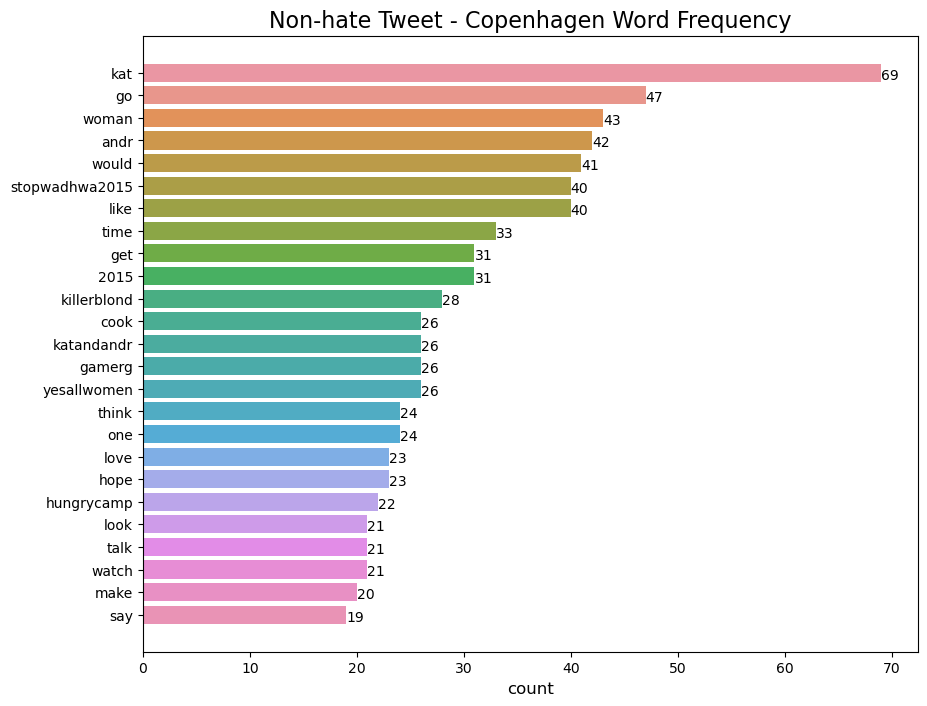

In [63]:
non_hate_frequency_copen = word_frequency_non_hate_copen.head(25)
plt.figure(figsize=(10,8))
ax = sb.barplot(x = non_hate_frequency_copen.values, y = non_hate_frequency_copen.index)
plt.title('Non-hate Tweet - Copenhagen Word Frequency', fontsize=16)
plt.xlabel('count', fontsize=12)
for p in ax.patches:
    ax.annotate("{:.0f}".format(p.get_width()), (p.get_x() + p.get_width(), p.get_y()+.5), ha='left', va='center')
plt.plot()

In [64]:
word_frequency_hate_copen = hate_copen['clean_tweet'].str.split(expand=True).stack().value_counts()

In [65]:
hate_frequency_copen = word_frequency_hate_copen.head(25)
hate_frequency_copen

notsexist            191
woman                174
sexist                82
girl                  58
men                   45
like                  43
cannot                39
kat                   39
femal                 35
get                   32
know                  32
think                 31
questionsformen       28
feminist              27
man                   26
go                    26
make                  25
want                  25
right                 24
one                   24
would                 23
spo                   23
call                  22
womenagainstfemin     22
watch                 22
dtype: int64

[]

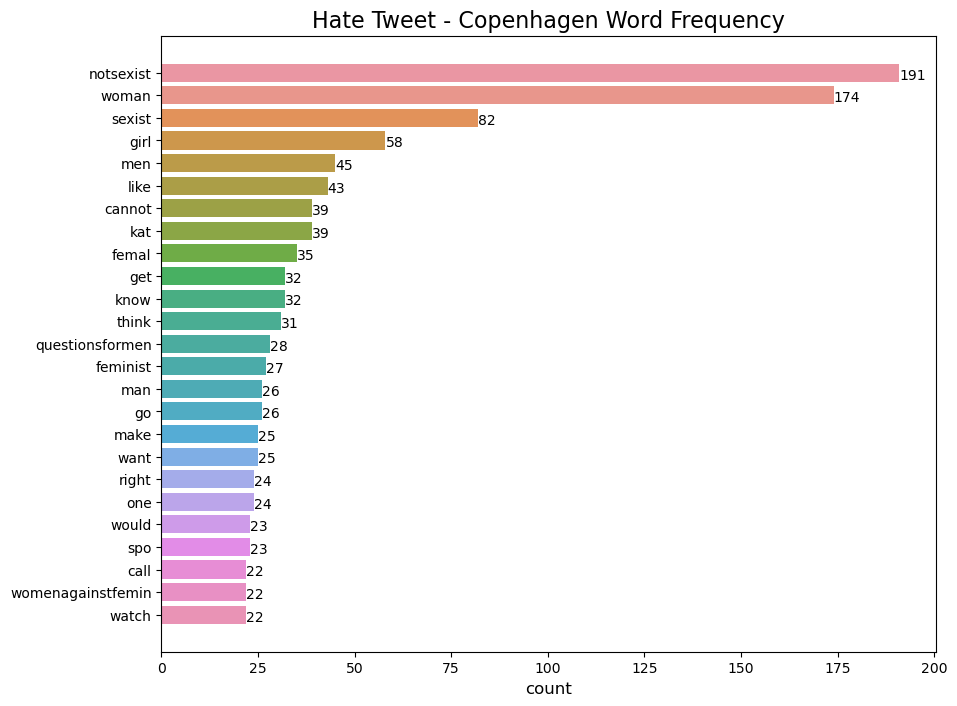

In [66]:
plt.figure(figsize=(10,8))
ax = sb.barplot(x = hate_frequency_copen.values, y = hate_frequency_copen.index)
plt.title('Hate Tweet - Copenhagen Word Frequency', fontsize=16)
plt.xlabel('count', fontsize=12)
for p in ax.patches:
    ax.annotate("{:.0f}".format(p.get_width()), (p.get_x() + p.get_width(), p.get_y()+.5), ha='left', va='center')
plt.plot()

# HASOC Dataset Visualization

### Read the Dataset 

In [67]:
hasoc = pd.read_csv('data/Cleaning/HASOC_Dataset.csv',on_bad_lines='skip')
hasoc.head()

label                                        clean_tweet  \
0      0  lulz new meme day opkkk optrump opdomesticterr...   
1      1  gandinaaliabus arnob r great job showcas genui...   
2      0  enough harass still like unwelcom rel leav eve...   
3      0  3rd class organ world biggest cup sad see help...   
4      0  hey love india cc dhonikeepstheglov balidaanba...   

                                          Hash Words  
0  #opkkk #optrump #opdomesticterrorism #fucktrum...  
1                                   #gandinaaliabuse  
2         #johnmccainday #trumpisatraitor #collusion  
3                                   #icc #shameonicc  
4  #dhonikeepstheglove #balidaanbadge #dhonikesaa...

In [68]:
hasoc.label.value_counts()

0    3419
1    1122
Name: label, dtype: int64

In [69]:
hasoc_profile = ProfileReport(hasoc, title ="HASOC Dataset Report")
hasoc_profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Boxplot of the Label Distribution  

In [70]:
hasoc['text length'] = hasoc['clean_tweet'].apply(len)

<AxesSubplot:xlabel='label', ylabel='text length'>

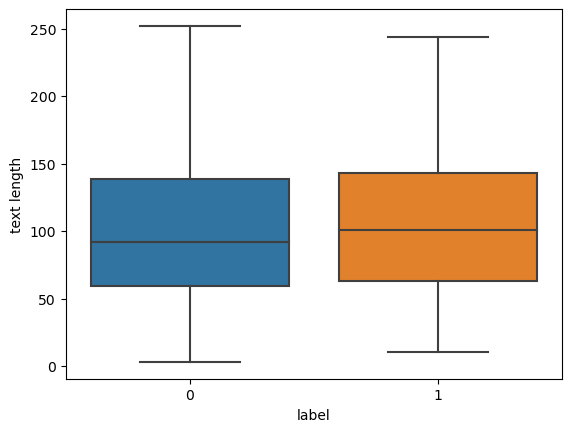

In [71]:
sb.boxplot(x='label', y='text length', data=hasoc)

### Wordcloud of the Most Popular Hashtags of Each Tweet Type

In [72]:
non_hate_hasoc = hasoc[hasoc['label'].astype(int) == 0]
non_hate_hasoc = non_hate_hasoc[non_hate_hasoc['Hash Words'] != 'No hashtags']
non_hate_hasoc

label                                        clean_tweet  \
0         0  lulz new meme day opkkk optrump opdomesticterr...   
2         0  enough harass still like unwelcom rel leav eve...   
3         0  3rd class organ world biggest cup sad see help...   
4         0  hey love india cc dhonikeepstheglov balidaanba...   
5         0  need check date bih rapist matur enough rape m...   
...     ...                                                ...   
4536      0  leader free world find need even care mayor ci...   
4537      0  befit repli section medium look controversi dh...   
4538      0  heard pa clear trumpisatraitor trumplieseveryt...   
4539      0  celebr putinspuppet desperatedonald trumpisatr...   
4540      0  final year obama presid gop frontrunn receiv g...   

                                             Hash Words  text length  
0     #opkkk #optrump #opdomesticterrorism #fucktrum...           96  
2            #johnmccainday #trumpisatraitor #collusion          130  
3                                      #icc #shameonicc          138  
4     #dhonikeepstheglove #balidaanbadge #dhonikesaa...           77  
5            #rapist #rape #hanged #hangrapistspublicly           82  
...                                                 ...          ...  
4536                  #pathetic #sociopathic #douchebag           89  
4537                   #dhonikeepstheglove #dhonigloves           71  
4538  #trumpisatraitor #trumplieseverytimehespeaks #...          149  
4539  #putinspuppet #desperatedonald #trumpisatraito...           87  
4540  #labamba #trumpisatraitor #trumpisadisgrace #s...          143  

[3365 rows x 4 columns]

In [73]:
non_hate_hasoc_wordcloud = WordCloud().generate(' '.join(non_hate_hasoc['Hash Words']))

(-0.5, 399.5, 199.5, -0.5)

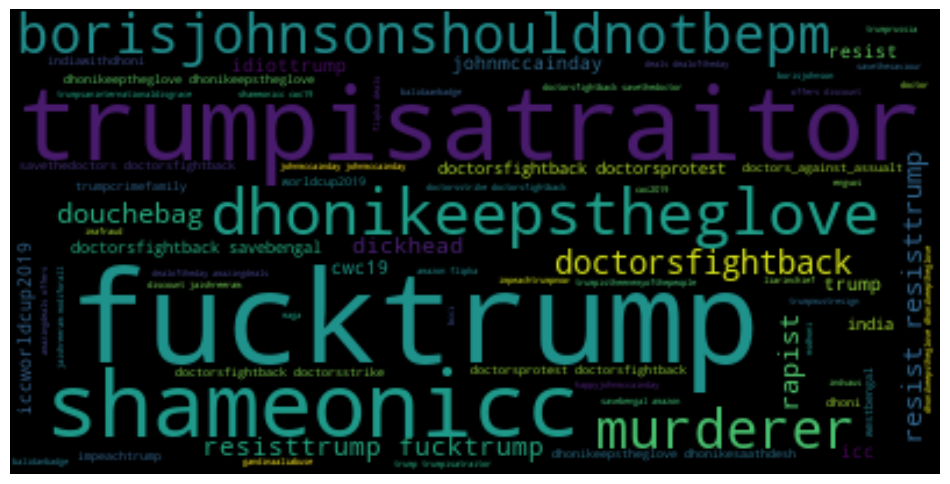

In [74]:
plt.figure(figsize= (12,8))
plt.imshow(non_hate_hasoc_wordcloud, interpolation = 'bilinear',cmap='viridis')
plt.axis('off')

In [75]:
hate_hasoc = hasoc[hasoc['label'].astype(int) == 1]
hate_hasoc = hate_hasoc[hate_hasoc['Hash Words'] != 'No hashtags']
hate_hasoc

label                                        clean_tweet  \
1         1  gandinaaliabus arnob r great job showcas genui...   
8         1                            chuch schumer douchebag   
14        1  bori knew avoid debat bori knew would expos hu...   
16        1  shameonicc cricket fan express frustrat record...   
18        1  islam mission wahabi terror jehad rapist loote...   
...     ...                                                ...   
4524      1  scroll see tweet unavail block fake follow rus...   
4528      1  worri jahil want remov polic 15 minut wipe hin...   
4533      1  america alway great ruin leader bloat bovin fo...   
4534      1  point wonder trump told lie commit crime trump...   
4535      1  fact fact trumpli trumplieseverytimehespeak tr...   

                                             Hash Words  text length  
1                                      #gandinaaliabuse           66  
8                                            #douchebag           23  
14                           #borisjohnsonshouldnotbepm          167  
16    #shameonicc: #worldcup2019 #raincife #cwc19 #r...          139  
18    #wahabi #terrorism #jehad #rapist #looter #mur...           94  
...                                                 ...          ...  
4524                     #fucktrump #fucktrump #science          150  
4528                                   #gandinaaliabuse           86  
4533                                         #fucktrump          109  
4534              #trump #lies #crimes #trumpisatraitor           56  
4535  #trumplies #trumplieseverytimehespeaks #trumpi...           59  

[1088 rows x 4 columns]

In [76]:
hate_hasoc_wordcloud = WordCloud().generate(' '.join(hate_hasoc['Hash Words']))

(-0.5, 399.5, 199.5, -0.5)

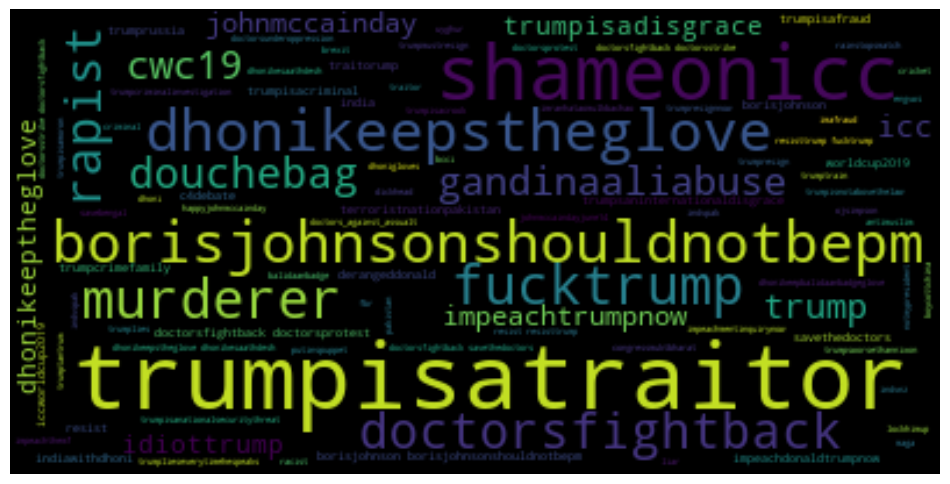

In [77]:
plt.figure(figsize= (12,8))
plt.imshow(hate_hasoc_wordcloud, interpolation = 'bilinear',cmap='viridis')
plt.axis('off')

### Frequency Distribution of the Top 25 Tokens 

In [78]:
word_frequency_non_hate_hasoc = non_hate_hasoc['clean_tweet'].str.split(expand=True).stack().value_counts()

In [79]:
print(word_frequency_non_hate_hasoc.head(25))

fucktrump                    610
doctorsfightback             506
trumpisatraitor              471
dhonikeepstheglov            427
doctor                       373
shameonicc                   366
trump                        342
borisjohnsonshouldnotbepm    244
murder                       240
icc                          217
resist                       215
dhoni                        192
peopl                        184
like                         184
world                        180
get                          170
would                        170
india                        164
u                            158
rapist                       155
say                          150
time                         145
go                           143
one                          132
rain                         132
dtype: int64


[]

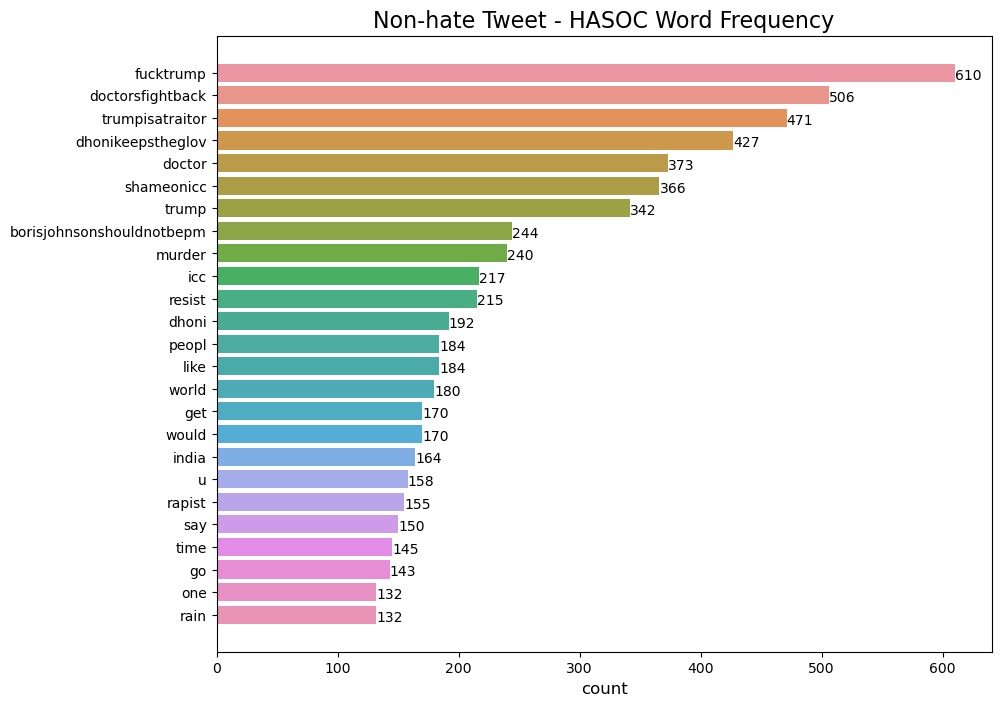

In [80]:
non_hate_frequency_hasoc = word_frequency_non_hate_hasoc.head(25)
plt.figure(figsize=(10,8))
ax = sb.barplot(x = non_hate_frequency_hasoc.values, y = non_hate_frequency_hasoc.index)
plt.title('Non-hate Tweet - HASOC Word Frequency', fontsize=16)
plt.xlabel('count', fontsize=12)
for p in ax.patches:
    ax.annotate("{:.0f}".format(p.get_width()), (p.get_x() + p.get_width(), p.get_y()+.5), ha='left', va='center')
plt.plot()

In [81]:
word_frequency_hate_hasoc = hate_hasoc['clean_tweet'].str.split(expand=True).stack().value_counts()

In [82]:
hate_frequency_hasoc = word_frequency_hate_hasoc.head(25)
hate_frequency_hasoc

trumpisatraitor              221
shameonicc                   147
trump                        116
borisjohnsonshouldnotbepm    109
murder                       104
doctorsfightback             104
dhonikeepstheglov             99
icc                           94
fucktrump                     93
peopl                         83
world                         77
rapist                        73
doctor                        73
get                           71
like                          68
cricket                       63
would                         59
match                         55
need                          54
know                          54
say                           54
rain                          53
go                            52
glove                         50
think                         49
dtype: int64

[]

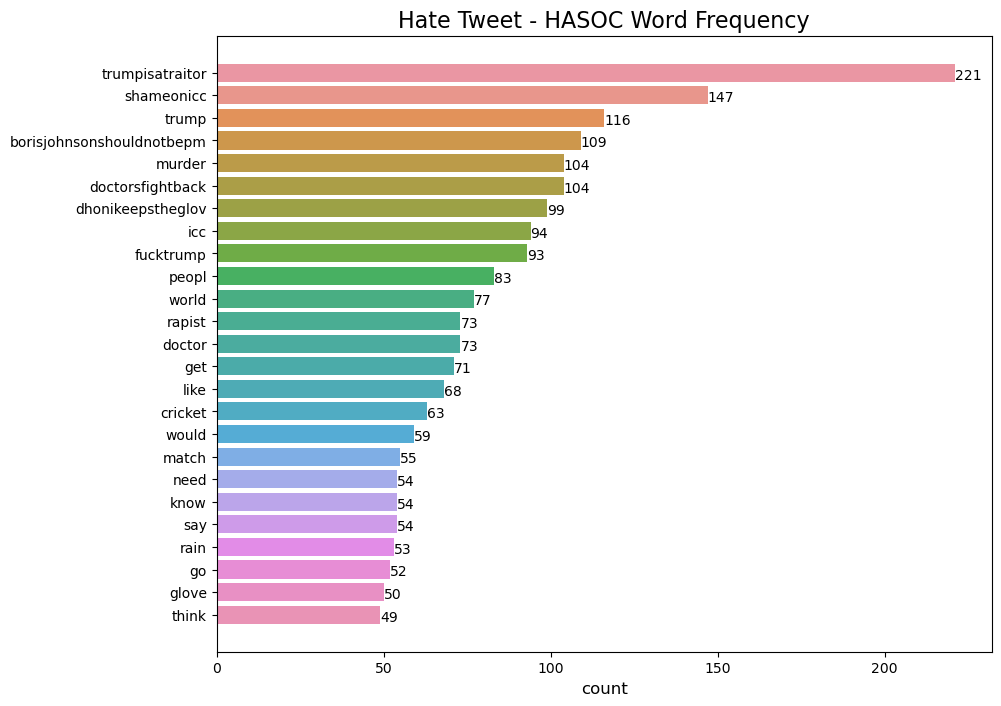

In [83]:
plt.figure(figsize=(10,8))
ax = sb.barplot(x = hate_frequency_hasoc.values, y = hate_frequency_hasoc.index)
plt.title('Hate Tweet - HASOC Word Frequency', fontsize=16)
plt.xlabel('count', fontsize=12)
for p in ax.patches:
    ax.annotate("{:.0f}".format(p.get_width()), (p.get_x() + p.get_width(), p.get_y()+.5), ha='left', va='center')
plt.plot()